In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sb

# Збір даних та його завантаження
Завантажимо датасет з kaggle, а саме Boston housing pricing

In [37]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names, dtype=float)

# Описова статистика для зібраних даних
## Опис стовбців даних
### В загальному існує 14 стовбців з даними:
<br>CRIM - рівень злочинності на душу населення за містом</br>
<br>ZN - частка житлової землі у відсотках, якщо площа займає більше ніж 25000 квадратних футів</br>
<br>INDUS - частка акрів на місто, що не продаються</br>
<br>CHAS - 1, якщо ділянка межує з річкою Чарльз, 0 - ні.</br>
<br>NOX - концентрація оксиду азоту</br>
<br>RM - середня кількість кімнат на житло</br>
<br>AGE - частка зайнятих  будинків у відсотоках, побудованих до 1940 року.</br>
<br>DIS - зважені відстані до п'яти центрів зайнятості у Бостоні</br>
<br>RAD - індекс доступності до магісталей</br>
<br>TAX - податок на майно за 10000 доларів США</br>
<br>PTRATIO - відношення учнів до вчителів за містом</br>
<br>B - 1000 (Bk - 0,63) ^ 2, де Bk - частка чорношкірих за містом</br>
<br>LSTAT - відсоток населення з низьким соціальним статусом</br>
<br>MEDV - середня вартість будинків в 1000 доларів США</br>

### Переглянемо перших п'ять рядків з датасету

In [38]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Подивимось інформацію по даним

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Можна побачити, що у нас є 13 стовбиків з даними, в кожному по 506 рядків

### Перевіримо дані на пропуски

In [5]:
print(f'Перевірка на Nan кожного стобчика:\n{df.isna().sum()}')

Перевірка на Nan кожного стобчика:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


### Виведемо описову статистику по всіх стовбчиках

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Попередньо можна побачити, що стовбець CRIM, ZN мають викиди, що дуже сильно відрізняються від інших значень. Також видно, що CHAS теж має викиди, але це пояснюється специфікою цього стовбця, річка Чарльз не може проходити біля кожної ділянки. Побудуємо графічне представлення даних, для більшої наглядності.

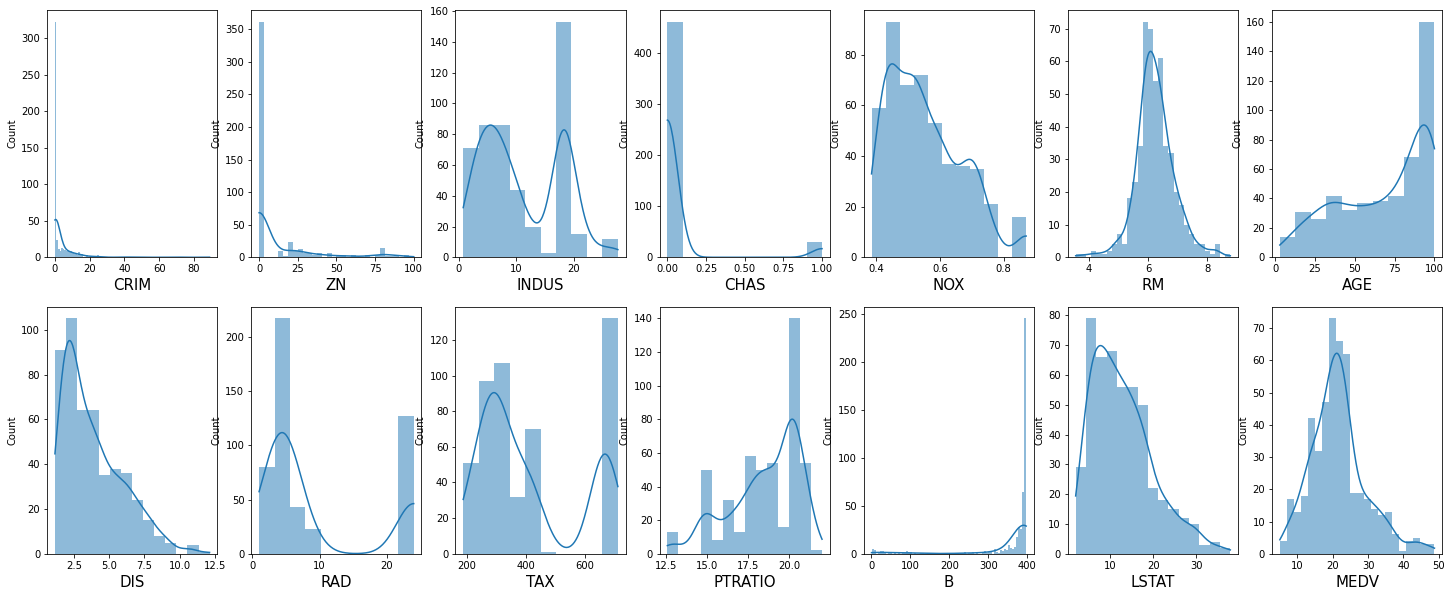

In [137]:
features_names = df.columns
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(25,10))
axes = axes.flatten()
index = 0
for name, series in df.items():
    sb.histplot(series, ax=axes[index], kde=True, linewidth=0)
    axes[index].set_xlabel(features_names[index], fontsize=15)
    index += 1
plt.show()

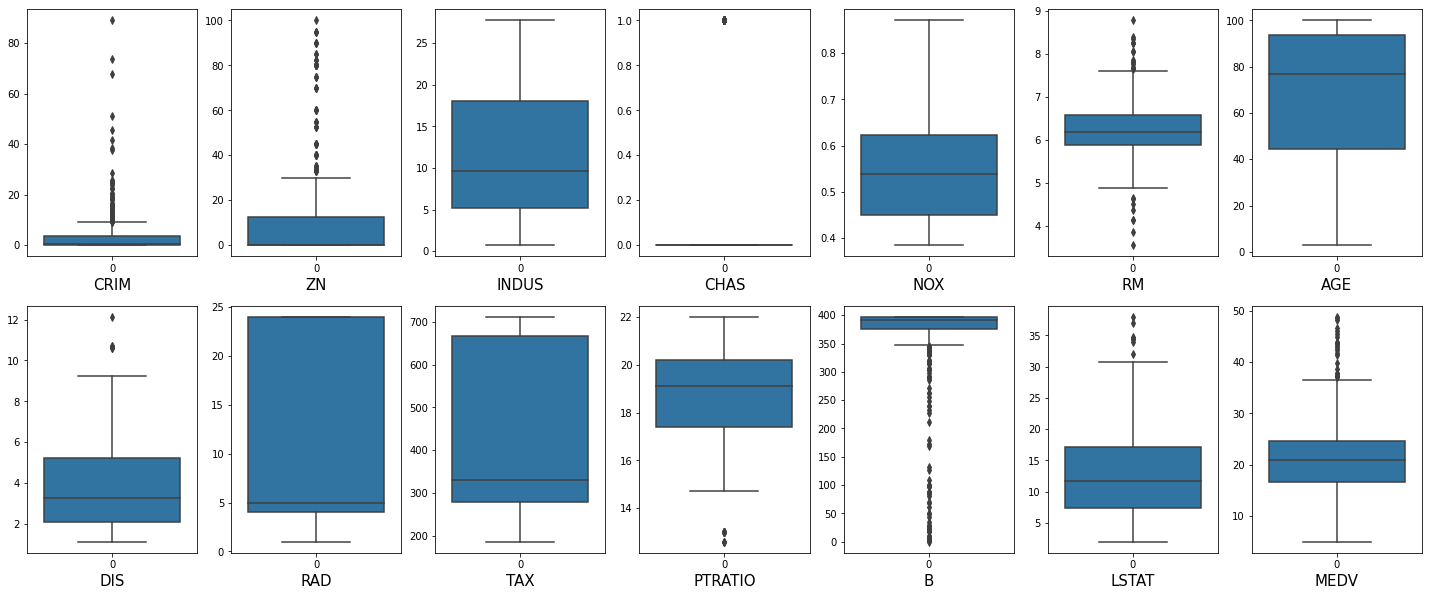

In [136]:
features_names = df.columns
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(25,10))
axes = axes.flatten()
index = 0
for name, series in df.items():
    sb.boxplot(data=series, ax=axes[index])
    axes[index].set_xlabel(features_names[index], fontsize=15)
    index += 1
plt.show()

Отже, можемо спостерігати наглядно, що стовбці CRIM, ZN, В та RM мають багато викидів. За попереднім аналізом зроблю висновок, що варто не включати CRIM, ZN, В до навчального набору, великої користі вони не принесуть, але можуть нашкодити. Щодо RM (середня кількість кімнат) можу сказати, що на мою думку це доволі суттєвий показник у виборі житла, тому спробую залишити його. 

# Мета дослідження та питання, на які має дати відповідь моє дослідження
### <br>Метою мого дослідження є прогнозування цін на нерухомість у Бостоні за вхідними даними.</br>
### <br>Питання: Який предиктор найбільше впливає на ціну нерухомості? Який впливає найменше?</br>

#### Подивимось на матрицю розсіювання для наших даних

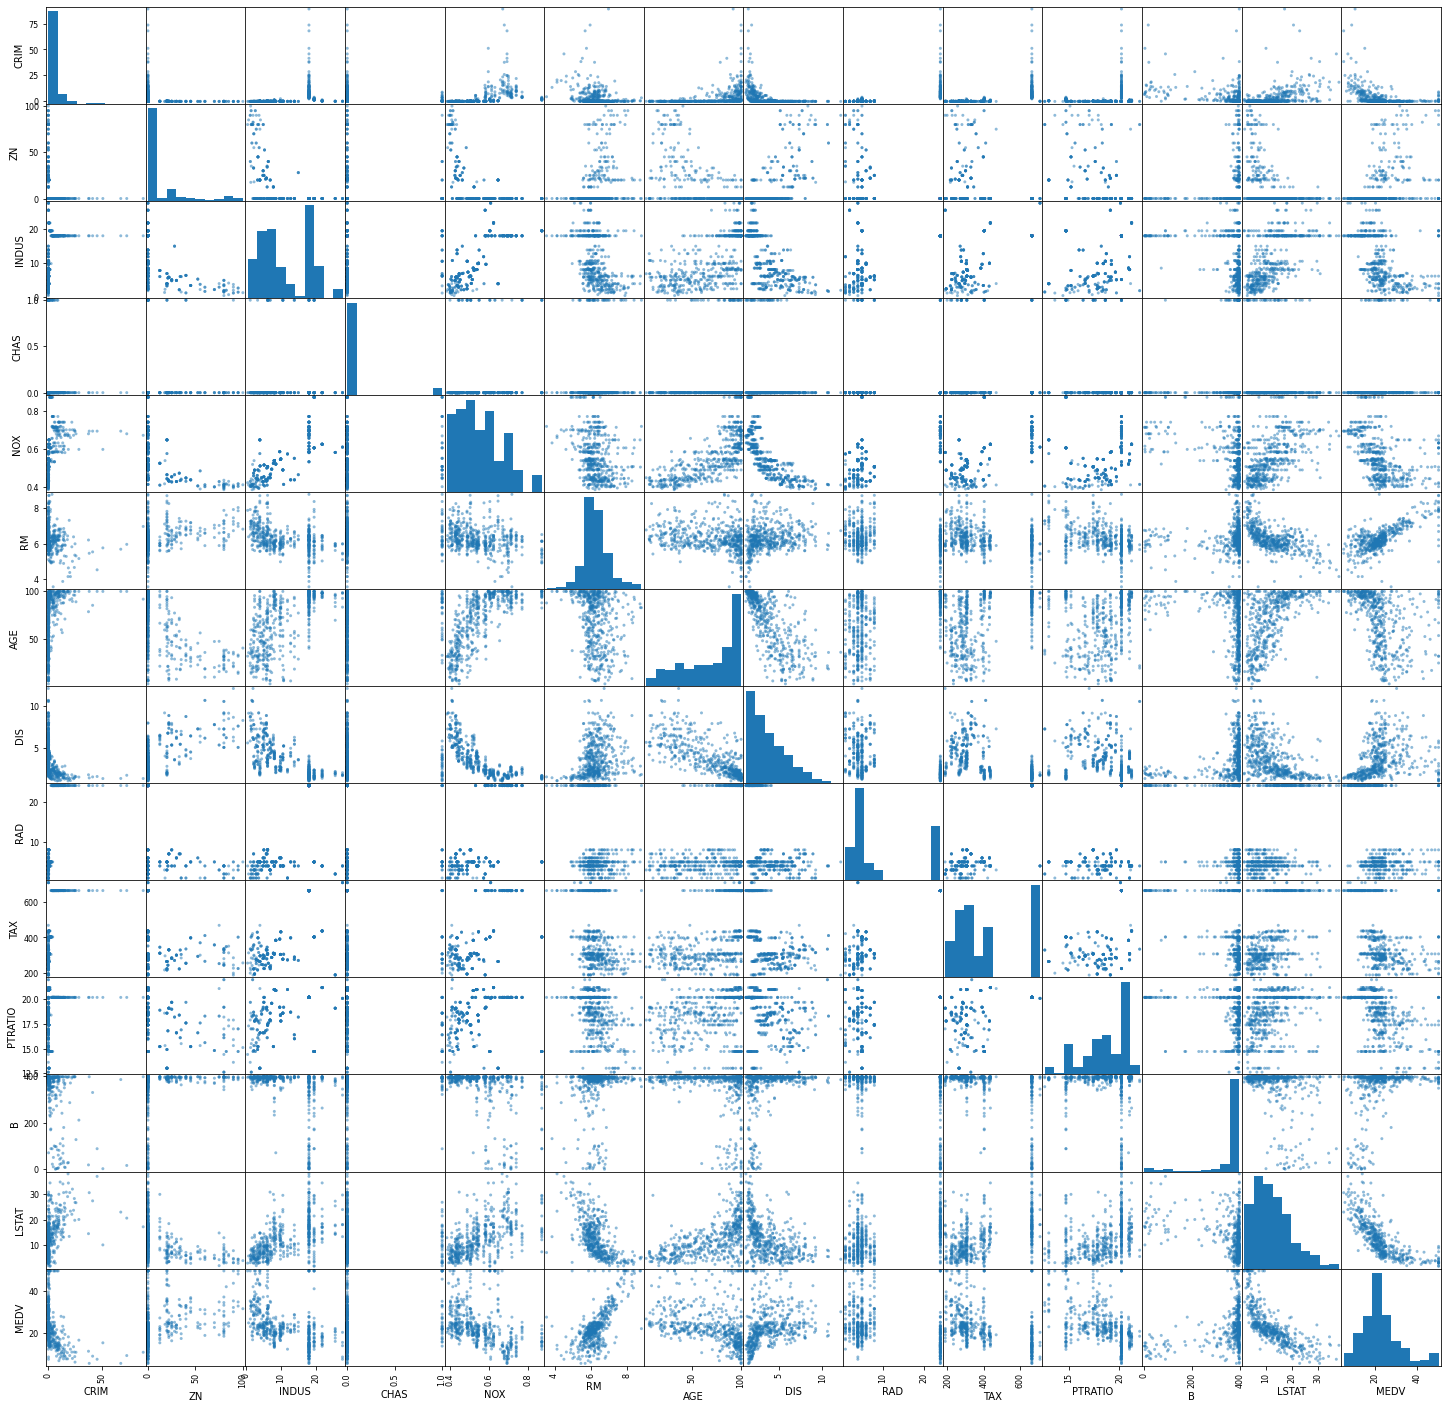

In [9]:
pd.plotting.scatter_matrix(df, figsize=(25,25))
plt.show()

З даної матриці розсіювання чітко видно лінйну залежність між кількістю кімнат та ціною. Також побачив поліноміальну залежність між % жителів з низьким соціальним статусом.

#### Подивимось на кореляційну теплову карту для наших стовбців

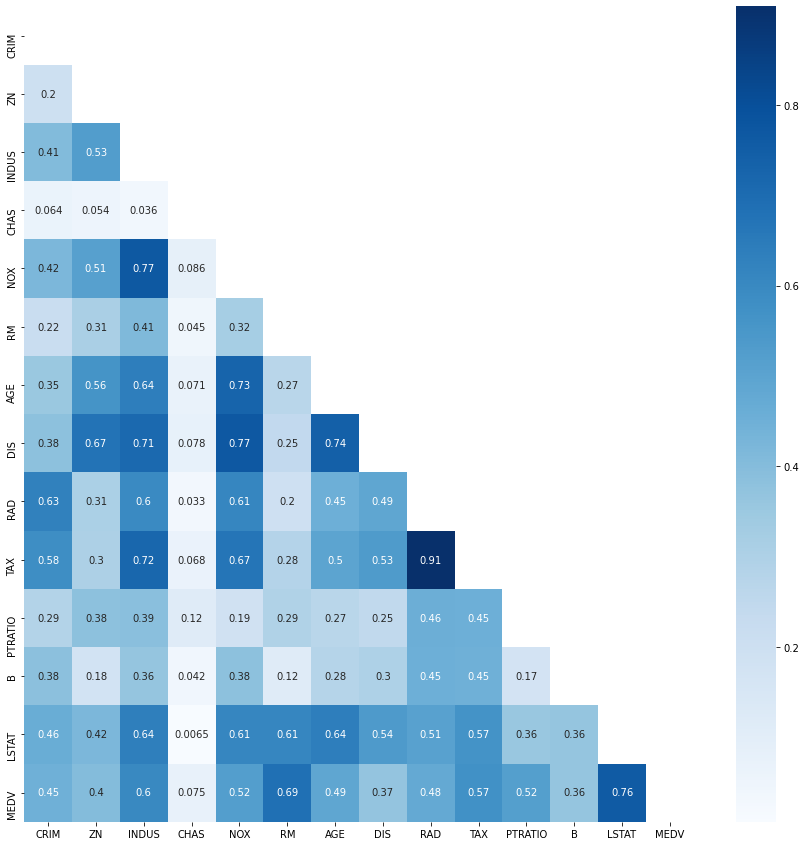

In [50]:
df = df[~(df['MEDV'] >= 50.0)]
mask = np.triu(df.corr().abs())
corr = df.corr().abs()
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(corr, cmap='Blues',annot=True,mask=mask)
plt.show()

З даної телової карти видно, що існує дуже сильна кореляція між NOX і TAX. Також найкраще на ціну впливає (тобто існує зв'язок) INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO, LSTAT. Це є досить непоганою причиною включити ці стобчики в модель для прогнозу.


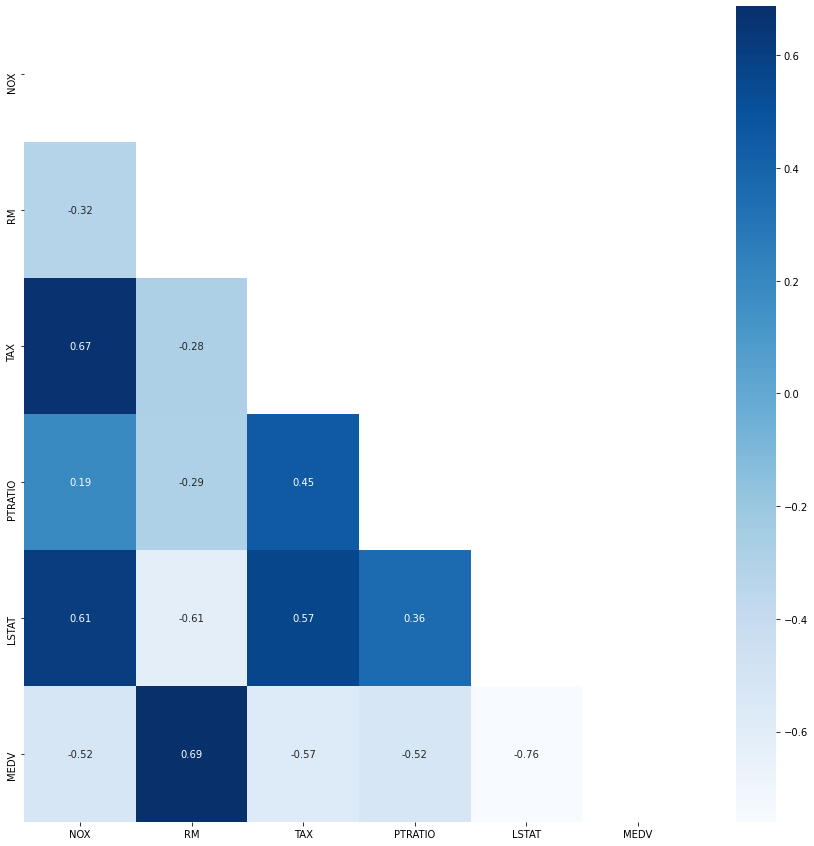

In [376]:
data = df[['NOX','RM','TAX','PTRATIO','LSTAT','MEDV']]
mask = np.triu(data.corr())
corr = data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(corr, cmap='Blues',annot=True,mask=mask)
plt.show()

#### Побудуємо діаграму розсіювання між ціною та INDUS, NOX, RM,AGE, RAD, TAX, PTRATIO, LSTAT

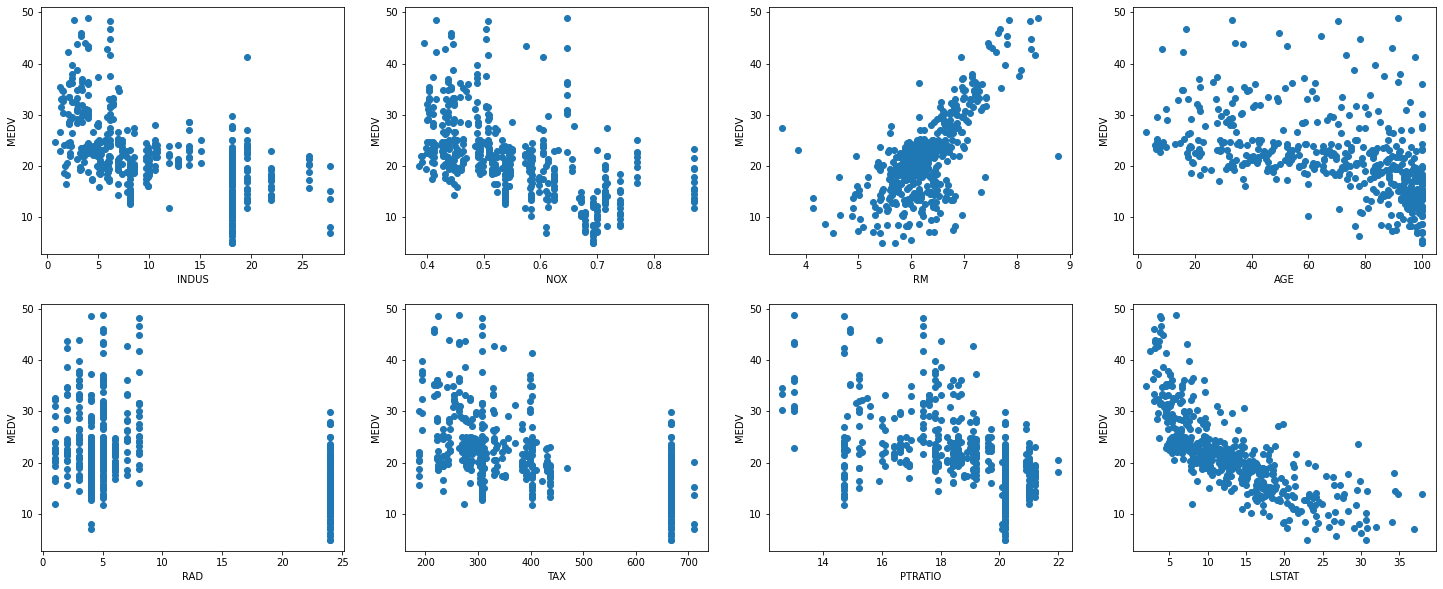

In [40]:
most_corr_features = ['INDUS','NOX','RM','AGE','RAD','TAX','PTRATIO','LSTAT']
medv = df['MEDV']
fig, axes = plt.subplots(2,4, figsize=(25,10))
k = 0
for i in range(2):
    for j in range(4):
        axes[i,j].scatter(df[most_corr_features[k]], medv)
        axes[i,j].set_xlabel(most_corr_features[k])
        axes[i,j].set_ylabel('MEDV')
        k+=1
plt.show()

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import linear_model

In [377]:
# 'NOX', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT'
# 'NOX','RM','TAX','PTRATIO','LSTAT'
# 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX'
features = df[['NOX','RM','TAX','PTRATIO','LSTAT']].to_numpy()
target = df['MEDV'].to_numpy().reshape(-1,1)

features = StandardScaler().fit_transform(features)

x_train, x_test, y_train, y_test = train_test_split(features, target ,test_size=0.25, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(367, 5)
(123, 5)
(367, 1)
(123, 1)


In [378]:
kf = KFold(n_splits=10)

### Лінійна регресія

In [383]:
linear_reg = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1).fit(x_train,y_train)

scores['Linear_regression'] = -cross_val_score(linear_reg, x_train,y_train, cv=kf, scoring='neg_root_mean_squared_error')

predict = linear_reg.predict(x_test)
RMSE = metrics.mean_squared_error(predict, y_test, squared=False)
R2 = metrics.r2_score(predict, y_test)
print(f'RMSE predict {RMSE}')
print(f'R2 predict {R2}')

RMSE predict 3.810079634334602
R2 predict 0.6729993930700107


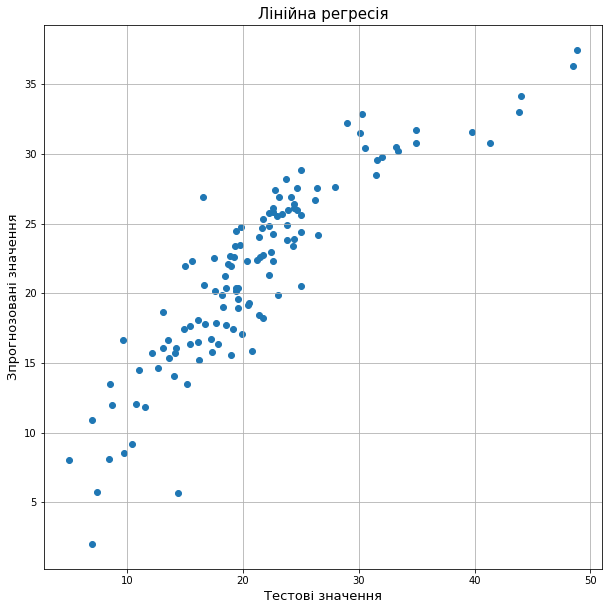

In [384]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, predict)
ax.set_xlabel("Тестові значення",fontsize=13)
ax.set_ylabel("Зпрогнозовані значення",fontsize=13)
ax.set_title("Лінійна регресія",fontsize=15)
plt.grid(True)
plt.show()

### Поліноміальна регресія


In [385]:
for degree in range(2,5):  
    poly_reg = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
    score = cross_val_score(poly_reg, x_train,y_train, cv=kf, scoring='neg_root_mean_squared_error').mean()
    print(f"degree = {degree}, score = {score}")

degree = 2, score = -3.223301464235783
degree = 3, score = -6.191316517207383
degree = 4, score = -9.025678393251999


In [386]:
pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
data = pipeline['polynomialfeatures'].fit_transform(x_train)
test_data = pipeline['polynomialfeatures'].fit_transform(x_test)
pipeline['linearregression'].fit(data, y_train)

scores['Poly_regression'] = -cross_val_score(pipeline, x_train,y_train, cv=kf, scoring='neg_root_mean_squared_error')
predict = pipeline['linearregression'].predict(test_data)
RMSE = metrics.mean_squared_error(predict, y_test, squared=False)
R2 = metrics.r2_score(predict, y_test)
print(f'RMSE predict {RMSE}')
print(f'R2 predict {R2}')


RMSE predict 2.6376590342938293
R2 predict 0.8686623989275284


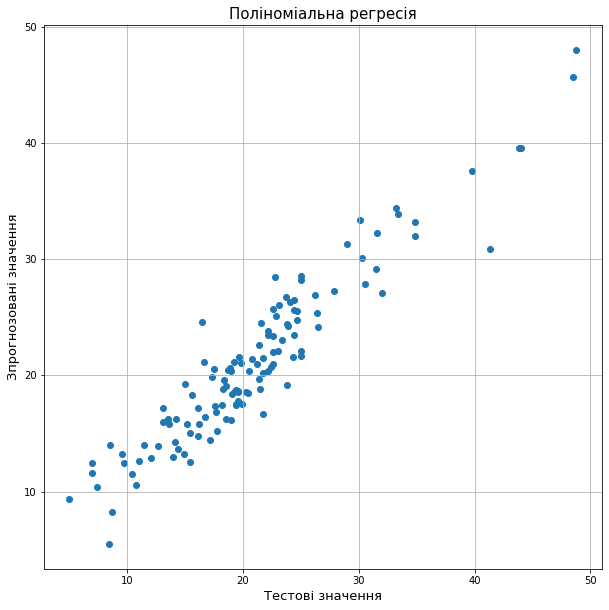

In [387]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, predict)
ax.set_xlabel("Тестові значення",fontsize=13)
ax.set_ylabel("Зпрогнозовані значення",fontsize=13)
ax.set_title("Поліноміальна регресія",fontsize=15)
plt.grid(True)
plt.show()

### Дерево регресор

In [388]:
for depth in range(3,10):
    tree_reg = DecisionTreeRegressor(criterion='mse', max_depth=depth)
    score = cross_val_score(tree_reg, x_train,y_train, cv=kf, scoring='neg_root_mean_squared_error').mean()
    print(f"depth = {depth}, score = {score}")

depth = 3, score = -4.114085926009303
depth = 4, score = -3.8198426934260317
depth = 5, score = -3.9552105279353946
depth = 6, score = -4.017282495642104
depth = 7, score = -4.110949408840103
depth = 8, score = -4.222272099868432
depth = 9, score = -4.150553680484781


In [389]:
tree_reg = DecisionTreeRegressor(criterion='mse', max_depth=6)   
scores['TreeRegressor'] = -cross_val_score(tree_reg, x_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

tree_reg.fit(x_train,y_train)
predict = tree_reg.predict(x_test)
RMSE = metrics.mean_squared_error(predict, y_test, squared=False)
R2 = metrics.r2_score(predict, y_test)
print(f'RMSE predict {RMSE}')
print(f'R2 predict {R2}')

RMSE predict 3.2649357753224653
R2 predict 0.8166685130219351


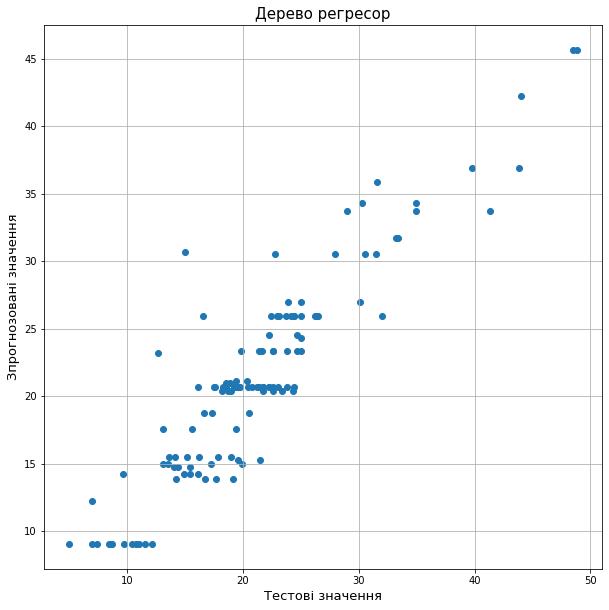

In [390]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, predict)
ax.set_xlabel("Тестові значення",fontsize=13)
ax.set_ylabel("Зпрогнозовані значення",fontsize=13)
ax.set_title("Дерево регресор",fontsize=15)
plt.grid(True)
plt.show()

In [391]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

random_forest_reg.fit(x_train, y_train.ravel())
scores['RandomForestRegressor'] = -cross_val_score(random_forest_reg, x_train, y_train.ravel(), cv=kf, scoring='neg_root_mean_squared_error')
predict = random_forest_reg.predict(x_test)
RMSE = metrics.mean_squared_error(predict, y_test, squared=False)
R2 = metrics.r2_score(predict, y_test)
print(f'RMSE predict {RMSE}')
print(f'R2 predict {R2}')

RMSE predict 2.9360732307386614
R2 predict 0.8328939580558818


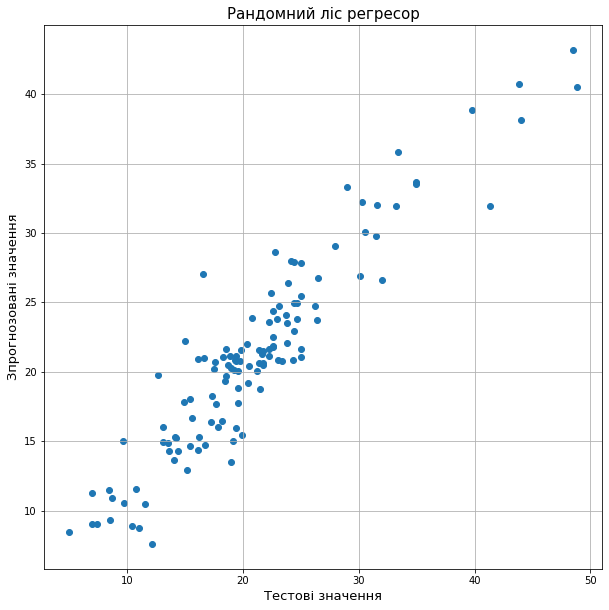

In [392]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, predict)
ax.set_xlabel("Тестові значення",fontsize=13)
ax.set_ylabel("Зпрогнозовані значення",fontsize=13)
ax.set_title("Рандомний ліс регресор",fontsize=15)
plt.grid(True)
plt.show()

In [393]:
from sklearn.neighbors import KNeighborsRegressor
for n in range(1,10):  
    KNN = KNeighborsRegressor(n_neighbors=n)
    KNN.fit(x_train, y_train)
    predict = KNN.predict(x_test)
    RMSE = metrics.mean_squared_error(predict, y_test, squared=False)
    print(f'neighbors - {n}, RMSE predict {RMSE}')

neighbors - 1, RMSE predict 3.9029694761434297
neighbors - 2, RMSE predict 3.125378025915913
neighbors - 3, RMSE predict 3.0354544535929704
neighbors - 4, RMSE predict 3.086622888151148
neighbors - 5, RMSE predict 3.040677074792838
neighbors - 6, RMSE predict 3.100220728220111
neighbors - 7, RMSE predict 3.091508250350906
neighbors - 8, RMSE predict 3.046297357689071
neighbors - 9, RMSE predict 3.019901202375136


In [394]:
KNN = KNeighborsRegressor(n_neighbors=8)
KNN.fit(x_train, y_train)

scores['RandomForestRegressor'] = -cross_val_score(KNN, x_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
predict = KNN.predict(x_test)
RMSE = metrics.mean_squared_error(predict, y_test, squared=False)
R2 = metrics.r2_score(predict, y_test)
print(f'RMSE predict {RMSE}')
print(f'R2 predict {R2}')

RMSE predict 3.046297357689071
R2 predict 0.8040276611918674


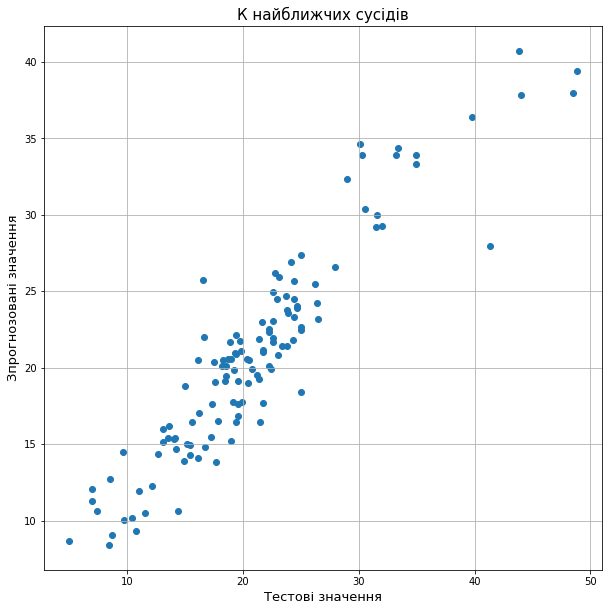

In [395]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(y_test, predict)
ax.set_xlabel("Тестові значення",fontsize=13)
ax.set_ylabel("Зпрогнозовані значення",fontsize=13)
ax.set_title("К найближчих сусідів",fontsize=15)
plt.grid(True)
plt.show()

In [396]:
scores

{'Linear_regression': array([3.1251732 , 3.68852674, 3.65888329, 4.04625138, 4.22653977,
        5.11610205, 5.28152161, 4.85568226, 4.70475949, 3.52587567]),
 'TreeRegressor': array([3.97663779, 3.74691181, 4.23581785, 4.29758558, 4.66872228,
        3.20942908, 3.89496692, 5.235146  , 5.0306551 , 3.53642079]),
 'Poly_regression': array([3.03735779, 2.86728731, 3.79051156, 4.2325277 , 2.39258401,
        2.81925753, 4.04494923, 3.47168116, 2.89679294, 2.68006542]),
 'RandomForestRegressor': array([2.89264196, 3.17147668, 4.03240411, 3.27724095, 2.64952348,
        3.56861495, 4.53128064, 3.65115445, 3.08031313, 2.73449623])}

In [397]:
best_model_pred = random_forest_reg.predict(x_test[0:100,::])
print(metrics.mean_squared_error(best_model_pred, y_test[0:100], squared=False))

2.9056992273805626


<AxesSubplot:>

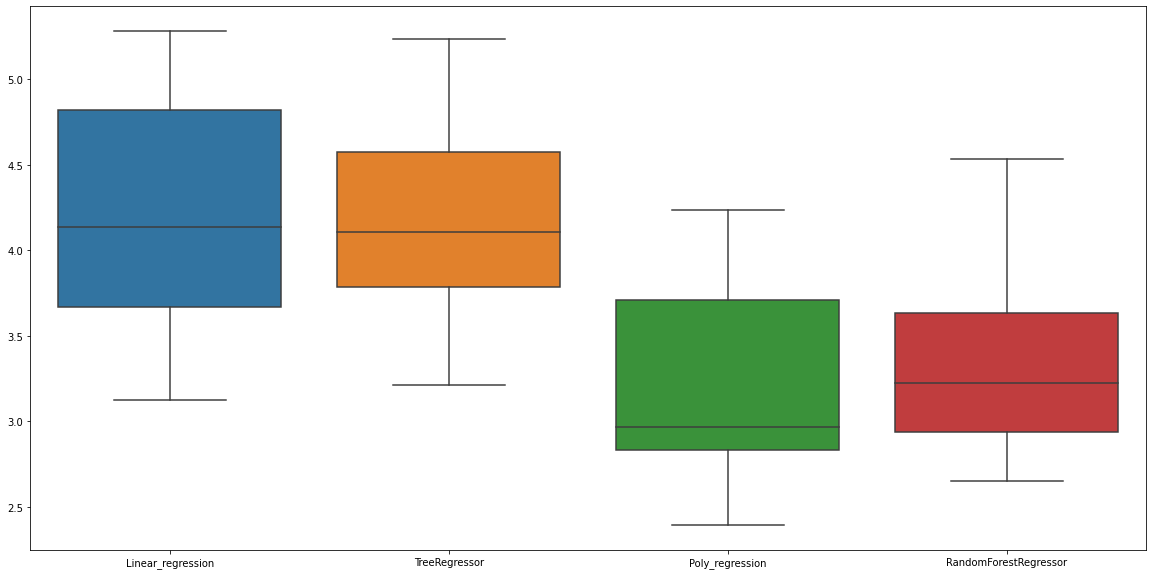

In [399]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores)
sb.boxplot(data=scores_map)

In [400]:
rand_pred = random_forest_reg.predict(x_test)
test_data = pipeline['polynomialfeatures'].fit_transform(x_test)
reg_pred = pipeline['linearregression'].predict(test_data)
print(metrics.mean_squared_error(rand_pred, y_test, squared=False))
print(metrics.mean_squared_error(reg_pred, y_test, squared=False))

2.9360732307386614
2.6376590342938293


In [403]:
pow2 = pipeline['linearregression'].coef_[0].reshape(-1,1)
pow2 = StandardScaler().fit_transform(pow2)
print(np.argmax(pow2))

2


In [402]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.random.rand(1000, 5)

poly = PolynomialFeatures(degree=2)
Y = poly.fit_transform(X)

features = ['X1','X2','X3','X4','X5']

print(poly.powers_.shape)
k = 1
for entry in poly.powers_:
    
    newFeature = []
    for feat, coef in zip(features, entry):
        if coef > 0:
            newFeature.append(feat+'**'+str(coef))
    if not newFeature:
        print(1) # If all powers are 0
    else:
        s = ' * '.join(newFeature)
        print(f"{s} -- {pow2[k]}")
        k+=1

(21, 5)
1
X1**1 -- [0.18684514]
X2**1 -- [2.46969563]
X3**1 -- [-1.11032687]
X4**1 -- [-0.41042949]
X5**1 -- [-2.50195677]
X1**2 -- [-0.21738047]
X1**1 * X2**1 -- [-0.82819932]
X1**1 * X3**1 -- [0.42614148]
X1**1 * X4**1 -- [-0.37910134]
X1**1 * X5**1 -- [-0.15877226]
X2**2 -- [0.44254546]
X2**1 * X3**1 -- [0.07055219]
X2**1 * X4**1 -- [-0.57169305]
X2**1 * X5**1 -- [-0.13788796]
X3**2 -- [0.44732536]
X3**1 * X4**1 -- [2.02500711]
X3**1 * X5**1 -- [-0.70853854]
X4**2 -- [-0.24315436]
X4**1 * X5**1 -- [0.12651122]
X5**2 -- [0.78226139]
